# Tarea realizada por Jesús Martínez Leal
Última edición: 15/02/2024

Descargarse el fichero utils de https://github.com/pavlin-policar/openTSNE/blob/master/examples/utils.py

In [1]:
from openTSNE import TSNE
from resources import utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Cargar datos

En este ejemplo se utiliza el dataset Macosko 2015, que son datos de retina de ratón. Se trata de un dataset bastante conocido y bastante explorado en la literatura. Se puede obtener en el siguiente enlace: http://file.biolab.si/opentsne/macosko_2015.pkl.gz

In [2]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


#### Crear train/test split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


#### Run t-SNE
Primero se creará un embedding de los datos. En el siguiente enlace encontrarás los parámetros de entrada de la función tsne.

https://opentsne.readthedocs.io/en/latest/api/index.html


In [6]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=-1,
    random_state=42,
    verbose=True,
)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 2.68 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.56 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.07 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.1602, 50 iterations in 1.2842 sec
Iteration  100, KL divergence 5.0991, 50 iterations in 1.3391 sec
Iteration  150, KL divergence 5.0652, 50 iterations in 1.2372 sec
Iteration  200, KL divergence 5.0500, 50 iterations in 1.3000 sec
Iteration  250, KL divergence 5.0421, 50 iterations in 1.2210 sec
   --> Time elapsed: 6.38 seconds
===> Running optimization with exaggeration=

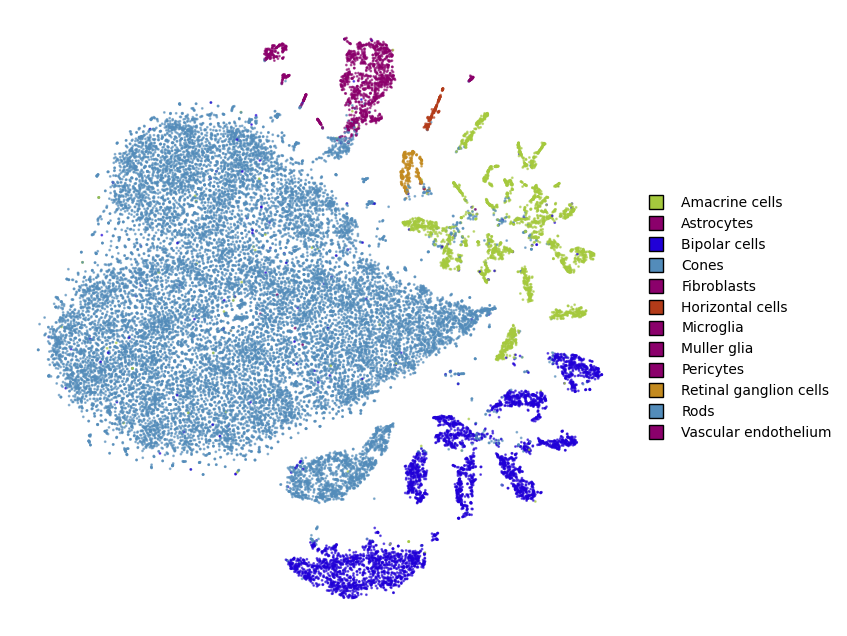

In [7]:
%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

#### Transformación

Actualmente openTSNE es la única librería que permite meter en el `embedding` nuevos puntos. 

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.72 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.05 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 213884.9915, 50 iterations in 0.2350 sec
Iteration  100, KL divergence 212341.2106, 50 iterations in 0.2570 sec
Iteration  150, KL divergence 211338.7829, 50 iterations in 0.2447 sec
Iteration  200, KL divergence 210607.6070, 50 iterations in 0.2400 sec
Iteration  250, KL divergence 210053.2446, 50 iterations in 0.2440 sec
   --> Time elapsed: 1.22 seconds
CPU times: total: 18.1 s
Wall time: 2.34 s


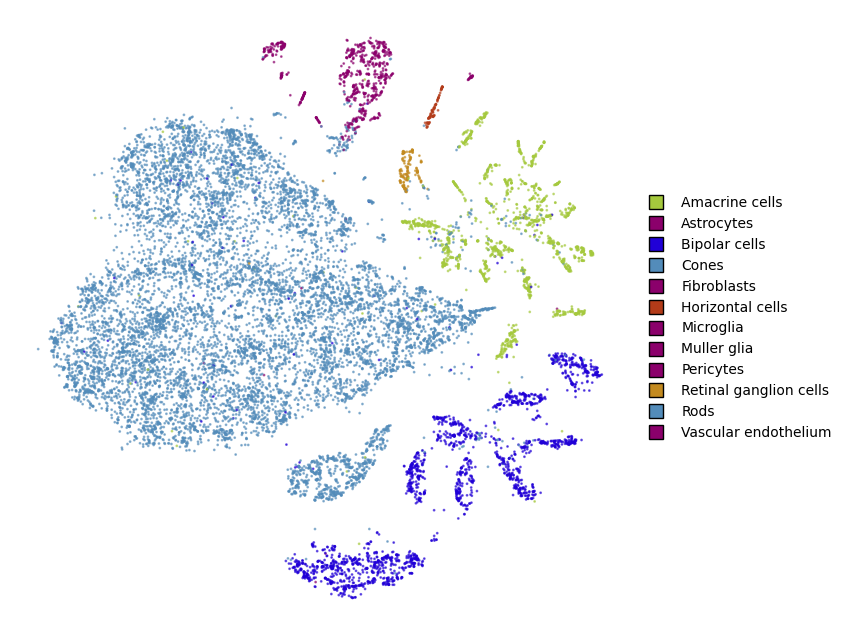

In [8]:
%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)


#### Todo junto

Superpone los puntos transformados en el `embedding`original. 

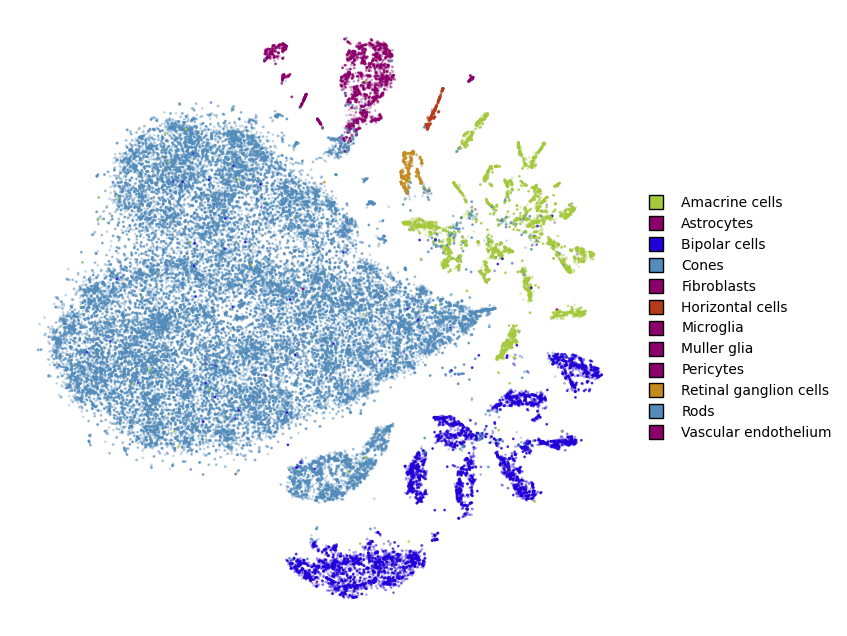

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)

## Ejercicios con OpenTSNE

Aplica el modelo t-SNE al dataset MNIST. 

#### Load data 
Load MNIST dataset: https://www.kaggle.com/weiouyang/test-dataset/version/1

(60000, 28, 28)
(60000,)


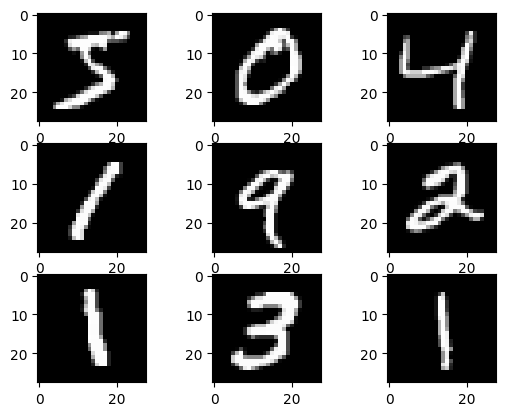

In [10]:
import gzip
import pickle
import sys
import matplotlib.pyplot as plt

f = gzip.open('data/mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    (X_train, y_train), (X_test, y_test) = pickle.load(f)
else:
    (X_train0, y_train), (X_test0, y_test) = pickle.load(f, encoding="bytes")
    
print(X_train0.shape)
print(y_train.shape)

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train0[i], cmap=plt.get_cmap('gray'))



In [11]:
X_train0=X_train0.reshape(60000,-1)

#### 1.- Empieza ejecutando la función con los valores por defecto (perplexity = 30, early_exaggeration = 12, initialization='pca')  para un subconjunto de train del 75% de la muestra.

Me quedo solo con las 10 mil primeras muestras por comodidad.

In [28]:
X_train0 = X_train0[:10000]
y_train = y_train[:10000]
#X_test0 = X_test0[:10000]
#y_test = y_test[:10000]

In [ ]:
from openTSNE import TSNE

# Crear un subconjunto de entrenamiento del 75% de la muestra
X_train0_subset, X_test0_subset, y_train_subset, y_test_subset = train_test_split(X_train0, y_train, test_size = 0.25, random_state = 42)

In [ ]:
tsne = TSNE(perplexity = 30, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = 8, verbose = False, initialization = 'pca')

embedding_train_default = tsne.fit(X_train0_subset)

In [ ]:
embedding_test_default = embedding_train_default.transform(X_test0_subset)

In [85]:
def plot_train_test_embedding(embedding_train, embedding_test, y_train, y_test, title = None):

    x_train_coords = embedding_train[:, 0]
    y_train_coords = embedding_train[:, 1]

    x_test_coords = embedding_test[:, 0]
    y_test_coords = embedding_test[:, 1]

    unique_classes = np.unique(y_train)

    plt.figure(figsize=(10, 6))
    for cls in unique_classes:
        train_indices = np.where(y_train == cls)
        plt.scatter(x_train_coords[train_indices], y_train_coords[train_indices], 
                    label=f' {cls}', s=10, alpha= 0.2, marker = 'x')

    for cls in unique_classes:
        test_indices = np.where(y_test == cls)
        plt.scatter(x_test_coords[test_indices], y_test_coords[test_indices], s = 10, alpha = 1, marker = 'o')

    plt.title(title if title else 't-SNE Embedding of Training and Testing Data')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend(title='Classes')

    # Agregar texto para indicar los marcadores utilizados
    plt.text(0.8, 0.15, 'Train: X', transform=plt.gca().transAxes, fontsize=20, verticalalignment='bottom')
    plt.text(0.8, 0.05, 'Test: O', transform=plt.gca().transAxes, fontsize=20, verticalalignment='bottom')

    plt.grid(True)
    plt.show()

#### 2.- Ejecuta el modelo sin early_exaggeration (early_exaggeration=1). ¿Qué diferencias observas y a qué se deben?

In [ ]:
tsne2 = TSNE(perplexity = 30, metric = 'euclidean', early_exaggeration = 1,  random_state = 42, n_jobs = 8, verbose = False, initialization = 'pca')

embedding_train_default2 = tsne2.fit(X_train0_subset)

In [ ]:
embedding_test_default2 = embedding_train_default2.transform(X_test0_subset)

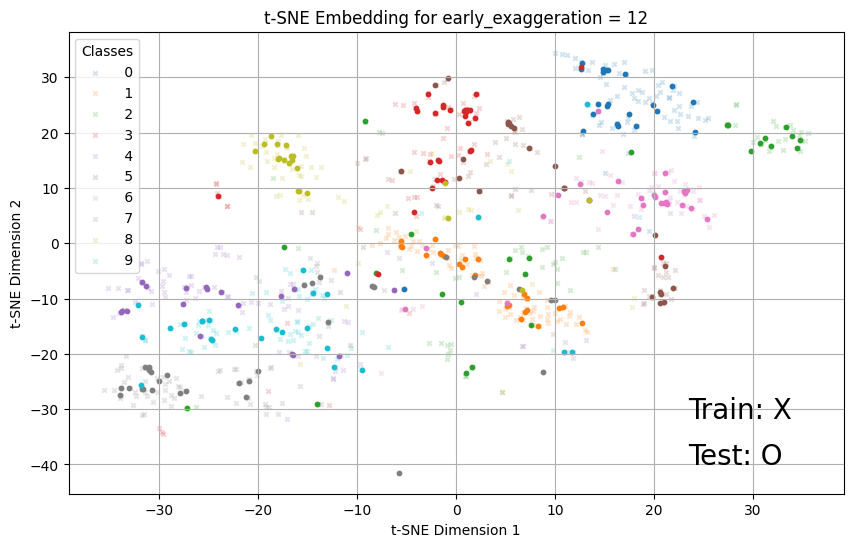

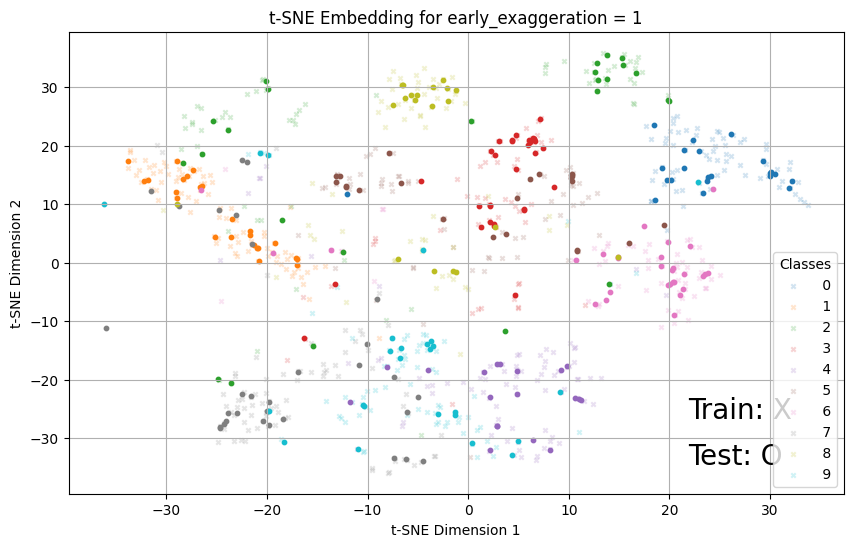

In [86]:
plot_train_test_embedding(embedding_train_default, embedding_test_default, y_train_subset, y_test_subset, title = "t-SNE Embedding for early_exaggeration = 12")
plot_train_test_embedding(embedding_train_default2, embedding_test_default2, y_train_subset, y_test_subset, title = "t-SNE Embedding for early_exaggeration = 1")

In [95]:
import pandas as pd

kl_train_1 = embedding_train_default.kl_divergence
kl_test_1 = embedding_test_default.kl_divergence

kl_train_2 = embedding_train_default2.kl_divergence
kl_test_2 = embedding_test_default2.kl_divergence

df_kl = pd.DataFrame({
    'KL (train)': [kl_train_1, kl_train_2],
    'KL (test)': [kl_test_1, kl_test_2]
}, index=['Embedding 1', 'Embedding 2'])

df_kl

,KL (train),KL (test)
Embedding 1,0.892682,1812.680531
Embedding 2,0.854245,1805.285559


El factor de `early_exaggeration` se utiliza típicamente durante la fase inicial. Este aumenta, básicamente, las fuerzas atractivas entre los puntos y permite que los puntos se muevan más libremente, encontrando más fácilmente los vecinos más cercanos.

El aumento de este valor suele llevar a clusters más separados. Es un poco difícil de discernir visualmente, pero sí que hay algunos indicios de este comportamiento. 

#### 3.- Ejecuta el modelo con los valores por defecto pero cambiando la inicialización a `random`. ¿Qué ocurre? ¿Obtenemos mejores o peores resultados que en el caso anterior? Compara también los tiempos de ejecución y comenta porqué difieren.

In [87]:
tsne3 = TSNE(perplexity = 30, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = 8, verbose = False, initialization = 'random')

embedding_train_default3 = tsne3.fit(X_train0_subset)

In [88]:
embedding_test_default3 = embedding_train_default3.transform(X_test0_subset)

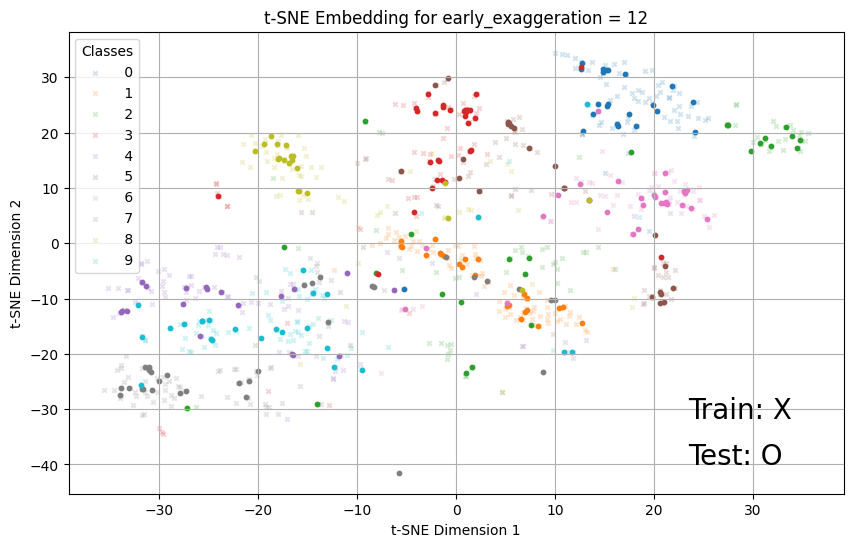

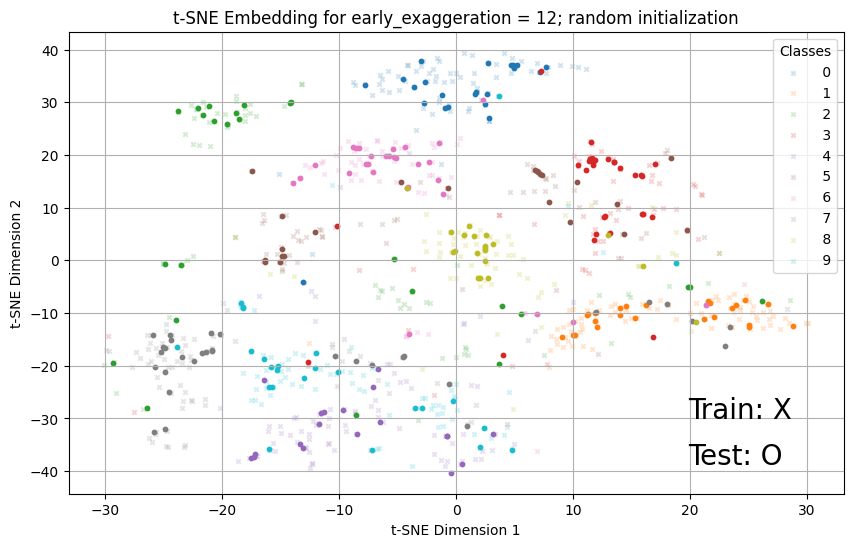

In [89]:
plot_train_test_embedding(embedding_train_default, embedding_test_default, y_train_subset, y_test_subset, title = "t-SNE Embedding for early_exaggeration = 12")
plot_train_test_embedding(embedding_train_default3, embedding_test_default3, y_train_subset, y_test_subset, title = "t-SNE Embedding for early_exaggeration = 12; random initialization")

In [96]:
kl_train_1 = embedding_train_default.kl_divergence
kl_test_1 = embedding_test_default.kl_divergence

kl_train_3 = embedding_train_default3.kl_divergence
kl_test_3 = embedding_test_default3.kl_divergence

df_kl = pd.DataFrame({
    'KL (train)': [kl_train_1, kl_train_3],
    'KL (test)': [kl_test_1, kl_test_3]
}, index=['Embedding 1', 'Embedding 3'])

df_kl

,KL (train),KL (test)
Embedding 1,0.892682,1812.680531
Embedding 3,0.885873,1801.294226


Los resultados en cuestiones de divergencia de Kullback-Leibler son bastante similares, pero se obtiene un mejor resultado para el de inicialización aleatoria. Esto no es nada concluyente, ya que la aleatoriedad es muy fuerte y con solo variar el random_state cambiarían nuestros resultados.

Con el de inicialización `random` tarda ligeramente más, ya que estamos comenzando con una distribución aleatoria de puntos en el espacio de embedding. Esto lleva a una convergencia a la solución diferente en comparación a la inicialización con PCA, donde los puntos iniciales están más agrupados según la estructura de los datos de entrada.

#### 4.- Ejecuta el modelo con 2 valores muy dispares de perplexity, por ejemplo 1 y 100, (y el resto de valores por defecto) y comenta los resultados.

In [100]:
tsne4 = TSNE(perplexity = 1, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = 8, verbose = False, 
             initialization = 'pca')

tsne5 = TSNE(perplexity = 100, metric = 'euclidean', early_exaggeration = 12,  random_state = 42, n_jobs = 8, verbose = False, 
             initialization = 'pca')

In [101]:
embedding_train_default4 = tsne4.fit(X_train0_subset)

In [102]:
embedding_test_default4 = embedding_train_default4.transform(X_test0_subset)

In [103]:
embedding_train_default5 = tsne5.fit(X_train0_subset)

In [104]:
embedding_test_default5 = embedding_train_default5.transform(X_test0_subset)

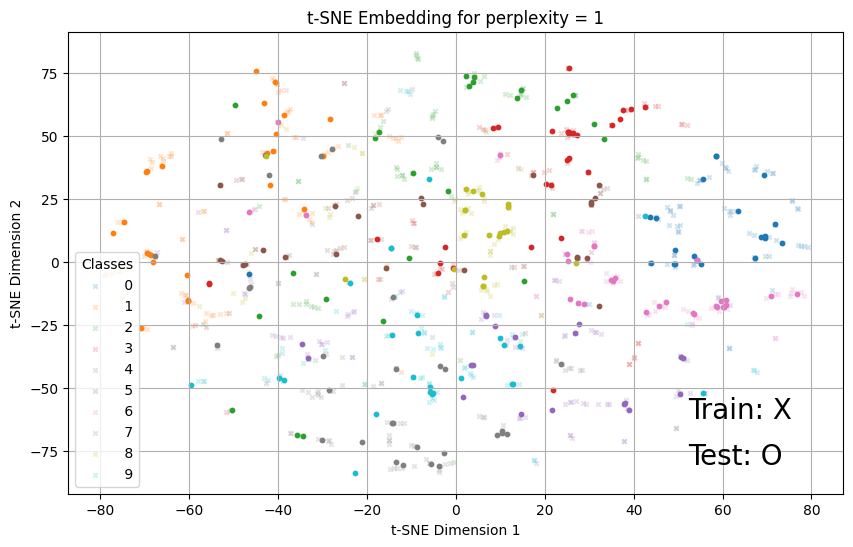

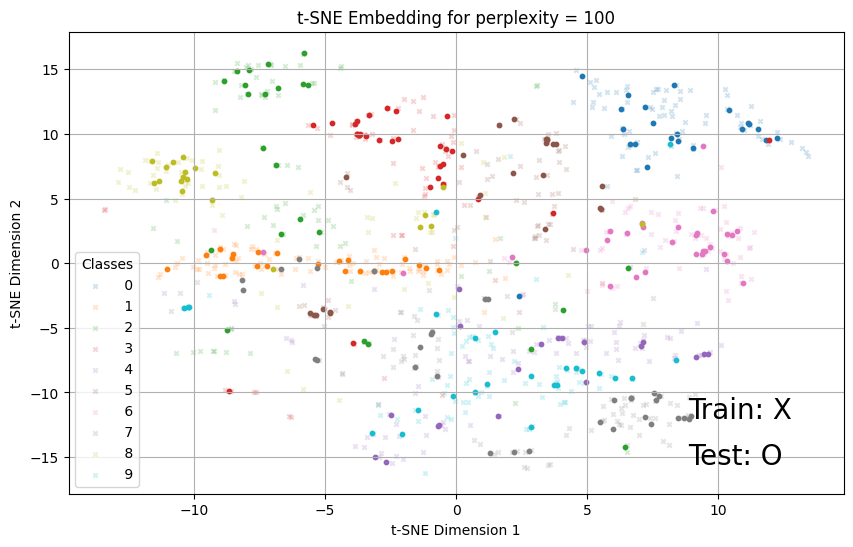

In [105]:
plot_train_test_embedding(embedding_train_default4, embedding_test_default4, y_train_subset, y_test_subset, title = "t-SNE Embedding for perplexity = 1")
plot_train_test_embedding(embedding_train_default5, embedding_test_default5, y_train_subset, y_test_subset, title = "t-SNE Embedding for perplexity = 100")

En el caso de `perplexity` = 1 observamos cómo está todo menos separado en clusters, ha habido mucha conservación de la estructura local.

#### 5.- De todas las configuraciones de t-SNE probadas en los ejercicios anteriores, escoge la que mejores resultados obtiene y aplica los datos de test al embedding. Representa el dataset entero.

Esto se ha hecho en todas las ocasiones anteriores.

## Ejercicios con TSNE de sklearn

La idea principal detrás de t-SNE es preservar la estructura local y global de los datos durante la reducción de dimensionalidad. Funciona calculando una distribución de probabilidad conjunta sobre pares de puntos en el espacio original, y una distribución de probabilidad similar en el espacio de menor dimensión. 

Luego, ajusta los puntos en el espacio de menor dimensión para minimizar la divergencia entre estas dos distribuciones de probabilidad, generalmente utilizando la divergencia de Kullback-Leibler.

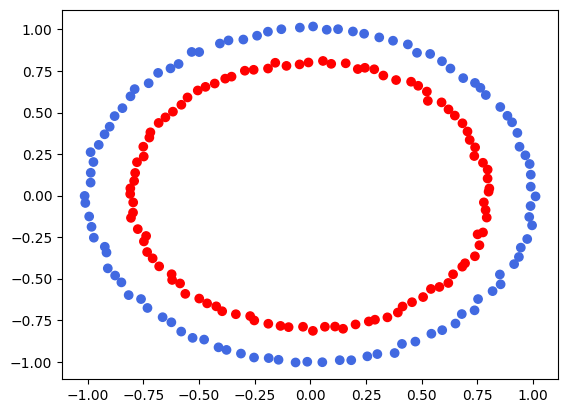

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01, random_state = 42)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

Para más información de TSNE en sklearn se tiene el enlace siguiente:

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

- `perplexity`: está relacionada con el número de vecinos cercanos que se usan en los algoritmos de manifold learning. Los datasets más grandes suelen requerir un valor mayor. 

- `early_exaggeration`: controla cómo de  ajustados son los grupos naturales en el espacio original en el espacio incrustado y cuánto espacio habrá entre ellos. Valores más grandes indican que hay más lugar entre los grupos naturales en el espacio incrustado.

#### 1. Ejecuta t-sne de sklearn con el dataset de los círculos variando la perplexity (valores 5, 30, 100).

In [41]:
def visualize_tsne(X, y, perplexities):
    plt.figure(figsize=(18, 6))
    num_perplexities = len(perplexities)
    
    kl_divergences = {}  # Diccionario para almacenar las divergencias KL
    
    for i, perplexity in enumerate(perplexities, start=1):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        X_tsne = tsne.fit_transform(X)
        
        plt.subplot(1, num_perplexities, i)
        unique_classes = np.unique(y)
        for cls in unique_classes:
            indices = np.where(y == cls)
            plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=f'Class {cls}', alpha=0.8)
        
        plt.title(f"Perplexity = {perplexity}")
        plt.xlabel("t-SNE Component 1")
        plt.ylabel("t-SNE Component 2")
        plt.legend()
        plt.grid(True)
        
        kl_divergences[perplexity] = tsne.kl_divergence_
    
    plt.tight_layout()
    plt.show()
    
    return kl_divergences


c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization

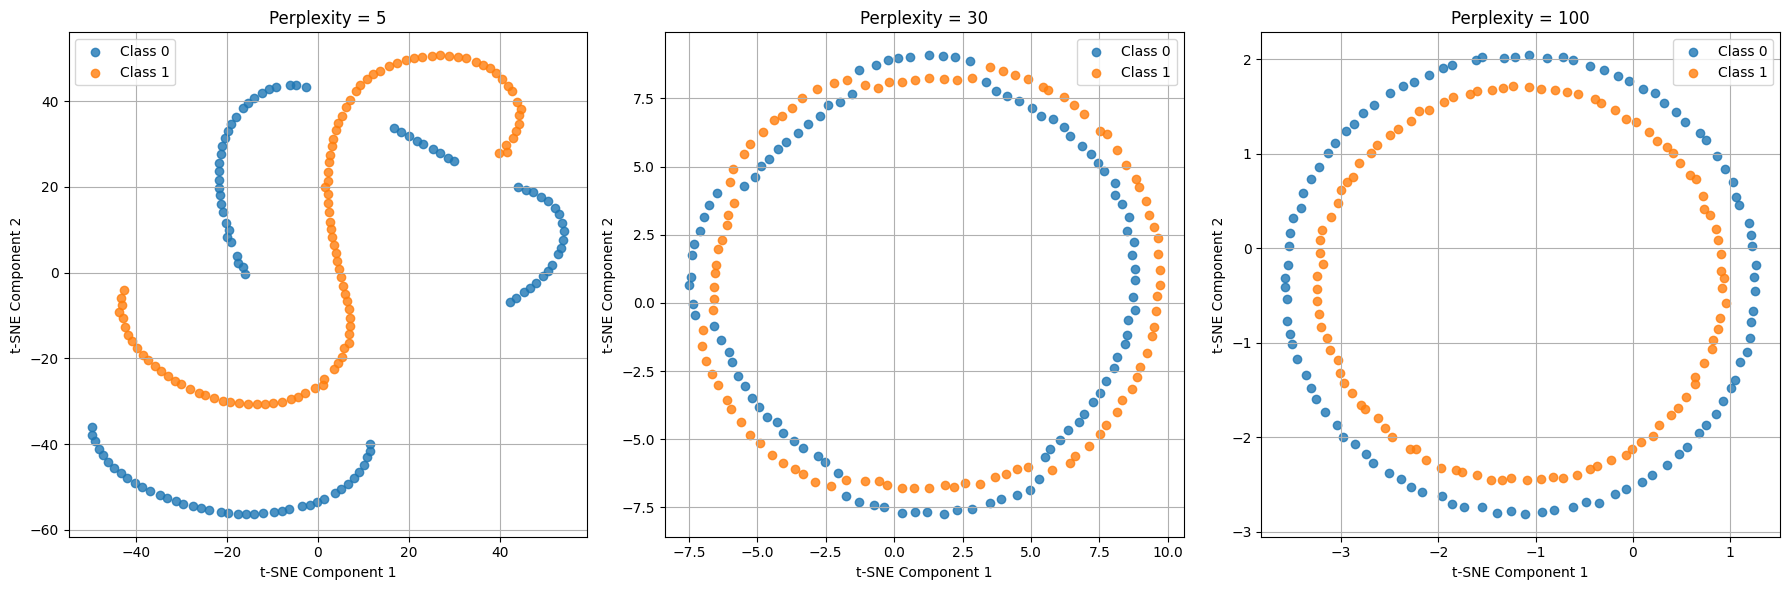

In [42]:
perplexities = [5, 30, 100]
kl_divergences = visualize_tsne(X, y, perplexities)

Vemos que con un valor de `perplexity` bajo las cosas no parecen ir bien y el aspecto de círculo desaparece completamente.

Con un `perplexity` de 30 vemos en alguna zona cosas extrañas, mientras que con un valor de `perplexity` de 100 todo parece estar perfectamente.

#### 2. ¿Que KL obtienes en cada caso?

In [43]:
print("KL Divergences:", kl_divergences)

KL Divergences: {5: 0.4045565128326416, 30: 0.19363267719745636, 100: 0.07120548188686371}


Vemos cómo aumentando el `perplexity` conseguimos divergencias de Kullback-Leibler cada vez menores, indicando que la discrepancia entre la distribución de probabilidad de los datos en el espacio original y la de estos en el reducido va disminuyendo.

#### 3. Compara los tiempos de ejecución de Barnes-Hut con el método exacto. Utiliza el valor de perplexity que mejor resultado haya obtenido según el ejercicio anterior.

In [47]:
import time

def run_tsne(X, perplexity, method):
    start_time = time.time()
    tsne = TSNE(n_components = 2, perplexity = perplexity, method = method, random_state = 42)
    X_tsne = tsne.fit_transform(X)
    
    end_time = time.time()
    execution_time = end_time - start_time
    return X_tsne, execution_time

perplexity = 100

# Método de Barnes-Hut
X_tsne_bh, execution_time_bh = run_tsne(X, perplexity, method = 'barnes_hut')

# Método exacto
X_tsne_exact, execution_time_exact = run_tsne(X, perplexity, method = 'exact')

print(f"Tiempo de ejecución usando Barnes-Hut: {execution_time_bh} segundos")
print(f"Tiempo de ejecución usando método exacto: {execution_time_exact} segundos")


c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Tiempo de ejecución usando Barnes-Hut: 0.28653502464294434 segundos
Tiempo de ejecución usando método exacto: 0.4057042598724365 segundos


Vemos como con el método de Barnes-Hut el tiempo requerido en el cálculo es algo inferior.

La idea principal tras este es que, en lugar de calcular la interacción de cada punto con todos los demás en el espacio de alta dimensión, aproximamos la influencia de grupos de puntos distantes usando su centroide. El espacio se divide en "celdas", por lo que en lugar de calcular todas las similitudes se calculan por esas "celdas".